<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
'''
前面发现，对于1-3层CNN，只要加了GlobalMaxPool1D就能够训练出某些acc＞0.9的，但是因为同时包含了激活函数为tanh，因此这里把'tanh'改为'relu'试试
整体效果感觉是不错，因此得出结论，这个GlobalMaxPool1D才是关键
'''
import platform
import tensorflow
import keras
from numpy.random import seed
print("Platform:{}".format(platform.platform()))
print("Tensorflow version:{}".format(tensorflow.__version__))
print("Keras version:{}".format(keras.__version__))
import numpy as np
from IPython.display import Image

from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPool1D, GlobalMaxPool1D
from keras.utils import plot_model
from keras.optimizers import Adam, SGD
from IPython.display import Image
from keras.utils import plot_model

Platform:Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version:2.9.2
Keras version:2.9.0


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1000, 4)]         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 981, 2)            162       
                                                                 
 pool_1 (MaxPooling1D)       (None, 122, 2)            0         
                                                                 
 global_max_pooling1d_3 (Glo  (None, 2)                0         
 balMaxPooling1D)                                                
                                                                 
 dense1 (Dense)              (None, 4)                 12        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                           

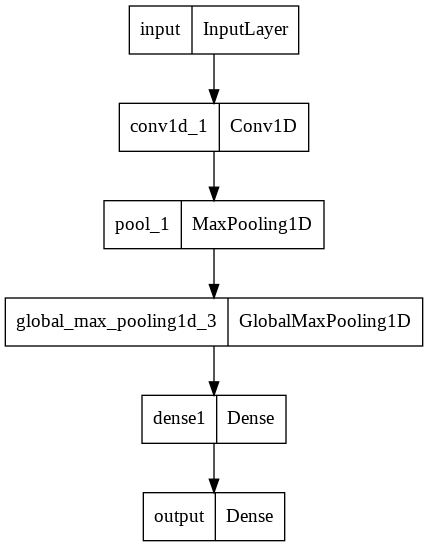

In [8]:
input = Input(shape=(1000, 4), name='input')
conv1d_1 = Conv1D(filters=2, kernel_size=20, activation='relu', name='conv1d_1')(input)
pool_1 = MaxPool1D(pool_size=8, name='pool_1')(conv1d_1)
# conv1d_2 = Conv1D(filters=2, kernel_size=20, activation='relu', name='conv1d_2')(pool_1)
# pool_2 = MaxPool1D(pool_size=2, name='pool_2')(conv1d_2)
# conv1d_3 = Conv1D(filters=2, kernel_size=20, activation='relu', name='conv1d_3')(pool_2)
# pool_3 = MaxPool1D(pool_size=2, name='pool_3')(conv1d_3)
goldpool_1 = GlobalMaxPool1D()(pool_1)
dense_1 = Dense(units=4, activation='relu', name='dense1')(goldpool_1)
# dense_2 = Dense(8, activation='relu', name='dense2')(dense_1)
output = Dense(1, activation='sigmoid', name='output')(dense_1)
model = Model(inputs=input, outputs=output)
print(model.summary())

plot_model(model,to_file='multiple_inputs.png')
Image('multiple_inputs.png')